In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프에 대한 기본설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['font.size'] = 16
plt.rcParams['axes.unicode_minus'] = False


In [13]:
drink = pd.read_csv('data/drinks.csv')
drink

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [14]:
# 결측치 확인
drink.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [15]:
# 사실 이 데이터의 대륙에서 결측치는  NA라는 단어를 의미한다.
drink['continent'].fillna('NA', inplace=True)
drink.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [16]:
# 대륙 확인
drink['continent'].value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

In [17]:
# 전체 술 소비량을 계산한다.
a1 = drink['beer_servings'] + drink['spirit_servings'] + drink['wine_servings']
drink['total_servings'] = a1
drink

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319
...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436
189,Vietnam,111,2,1,2.0,AS,114
190,Yemen,6,0,0,0.1,AS,6
191,Zambia,32,19,4,2.5,AF,55


In [18]:
# 술 소비량 대비 알콜 비율을 계산한다.
a1 = drink['total_litres_of_pure_alcohol'] / drink['total_servings']
a1

0           NaN
1      0.017818
2      0.017949
3      0.017842
4      0.018495
         ...   
188    0.017661
189    0.017544
190    0.016667
191    0.045455
192    0.054651
Length: 193, dtype: float64

In [19]:
# 전체 술 소비량이 0인 국가는 계산 자체가 성립되지 않기 때문에
# 결측치로 나온다. 결측치를 0으로 채워준다.
a1.fillna(0, inplace=True)
a1.isna().sum()

0

In [20]:
# 알콜 비율을 데이터 프레임에 추가한다.
drink['alcohol_rate'] = a1
drink

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,0.000000
1,Albania,89,132,54,4.9,EU,275,0.017818
2,Algeria,25,0,14,0.7,AF,39,0.017949
3,Andorra,245,138,312,12.4,EU,695,0.017842
4,Angola,217,57,45,5.9,AF,319,0.018495
...,...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436,0.017661
189,Vietnam,111,2,1,2.0,AS,114,0.017544
190,Yemen,6,0,0,0.1,AS,6,0.016667
191,Zambia,32,19,4,2.5,AF,55,0.045455


In [21]:
# 국가와 알콜 비율을 추출한다.
country_width_rank = drink[['country', 'alcohol_rate']]
country_width_rank

,country,alcohol_rate
0,Afghanistan,0.000000
1,Albania,0.017818
2,Algeria,0.017949
3,Andorra,0.017842
4,Angola,0.018495
...,...,...
188,Venezuela,0.017661
189,Vietnam,0.017544
190,Yemen,0.016667
191,Zambia,0.045455


In [22]:
# alcohol_rate를 기준으로 내림차순 정렬한다.
country_width_rank.sort_values('alcohol_rate', ascending=False, inplace=True)

/Users/hyojinlee/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [23]:
# index를 리셋한다(0 부터 1씩 증가..)
country_width_rank.reset_index(drop=True, inplace=True)
# country를 제거한다.
country_width_rank2 = country_width_rank.drop('country', axis=1)
country_width_rank2

,alcohol_rate
0,0.266667
1,0.223333
2,0.185714
3,0.153704
4,0.151111
...,...
188,0.000000
189,0.000000
190,0.000000
191,0.000000


In [24]:
# South Korea의 index 를 가져온다.
idx = country_width_rank.query('country == "South Korea"').index
idx[0]

14

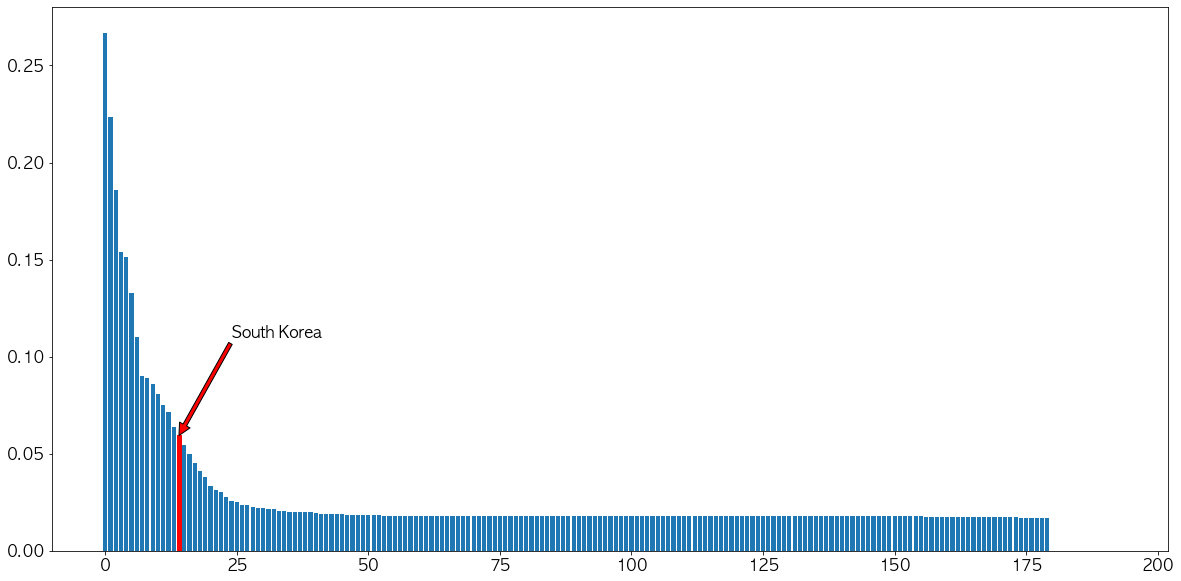

In [28]:
#시각화 한다.
# 그래프를 그리는 함수는 그래프 안의 요소들을 제어할 수 있도록 객체를
# 생성해 반환한다. 막대 그래프인 경우에는 막대 하나당 하나의 객체가 생성된다.
bar_list = plt.bar(country_width_rank2.index, country_width_rank2['alcohol_rate'])

# 한국에 해당하는 막대 그래프 객체를 추출한다.
korea_bar = bar_list[idx[0]]
# 붉은 색을 설정한다.
korea_bar.set_color('r')

# 어노테이션을 표시한다.
# 어노테이션을 표시할 막대의 순서값
x = idx[0]
# 어노테이션을 표시할 y 값
y = country_width_rank2.loc[x]
# 어노테이션 내의 화살표 위치
# 문자열이 표시될 위치를 현재 막대에서 10개 이후의 위치로 옮긴다.
ann_x = idx[0] + 10
ann_y = y + 0.05
# 어노테이션 옵션
arrow_dict = {
    'facecolor' : 'red'
}

# xy -> 어노테이션 위치
# xytext -> 어노테이션에 있는 문자열 위치 조절
# annotation은 투명이어서 색을 추가해줘야함 그리고 annotation은 문자, 화살표로 묶어 있다. 그래서 문자열 위치를 조절하면 문자열과 연결된 화살표도 나온다. 
plt.annotate('South Korea', xy=(x, y), xytext=(ann_x, ann_y), arrowprops=arrow_dict)

plt.show()